In [5]:
pip install pennylane pennylane-catalyst pennylane-lightning-gpu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pennylane-catalyst (from versions: none)
ERROR: No matching distribution found for pennylane-catalyst

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pennylane as qml
import jax.numpy as jnp

import jax

# Set number of wires
num_wires = 28

# Set a random seed
key = jax.random.PRNGKey(0)

dev = qml.device("lightning.gpu", wires=num_wires)

@qml.qjit(autograph=True)
@qml.qnode(dev)
def circuit(params):

    # Apply layers of RZ and RY rotations
    for i in range(num_wires):
        qml.RZ(params[3*i], wires=[i])
        qml.RY(params[3*i+1], wires=[i])
        qml.RZ(params[3*i+2], wires=[i])

    return qml.expval(qml.PauliZ(0) + qml.PauliZ(num_wires-1))

# Initialize the weights
weights = jax.random.uniform(key, shape=(3 * num_wires,), dtype=jnp.float32)



DeviceError: Device lightning.gpu does not exist. Make sure the required plugin is installed.

我们先从最基础的量子电路开始

In [18]:
# Basic Quantum circuit with PennyLane
import pennylane as qml
import numpy as np

def my_quantum_function(x, y):
    # 在量子电路中应用量子门

    # RZ 门作用在第0个量子比特上
    # 其中RZ门是绕Z轴旋转的门 作用是将量子态绕Z轴旋转一个角度x 
    qml.RZ(x, wires=0)

    # CNOT是受控非门 作用是将第0个量子比特作为控制比特，第1个量子比特作为目标比特
    # CNOT 门作用在第0和第1个量子比特上
    qml.CNOT(wires=[0,1])

    # RY是绕Y轴旋转的门 作用是将量子态绕Y轴旋转一个角度y
    # RY 门作用在第1个量子比特上
    qml.RY(y, wires=1)

    return qml.expval(qml.Z(wires=1))

Visualization

In [19]:
dev = qml.device('default.qubit', wires=12)
circuit = qml.QNode(my_quantum_function, dev)
print(qml.draw(circuit)(np.pi / 4, 0.7))

0: ──RZ(0.79)─╭●───────────┤     
1: ───────────╰X──RY(0.70)─┤  <Z>


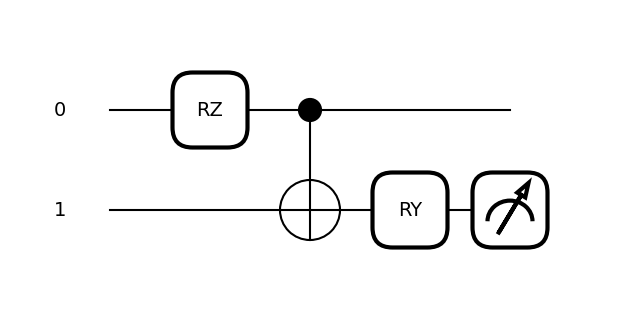

In [20]:
import matplotlib.pyplot as plt
# 假设 circuit 已经如上定义
fig, ax = qml.draw_mpl(circuit)(0.5, 0.7) # 示例参数值

plt.show()
